In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator
import time
from TDD.TDD import Index,Ini_TDD,get_tdd,get_unique_table,loc_contract,global_normalize
from TDD.TDD_show import TDD_show

In [2]:
# path='Benchmarks/'
# file_name="3_17_13.qasm"
# cir=QuantumCircuit.from_qasm_file(path+file_name)
# cir.draw()

('y', (1000000, 0), (-1000000, 0), 0, 0) 1
('x', (1000000, 0), (1000000, 0), 0, 1) 2
{1: {0: <TDD.TDD.Node object at 0x0000026EED8DBF48>, 1: <TDD.TDD.Node object at 0x0000026EED8DE1C8>}, 0: {2: <TDD.TDD.Node object at 0x0000026EED4BBB48>}}
{1: <TDD.TDD.Node object at 0x0000026EED8DBF48>, ('y', (1000000, 0), (-1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DE1C8>, ('x', (1000000, 0), (1000000, 0), 0, 1): <TDD.TDD.Node object at 0x0000026EED4BBB48>}


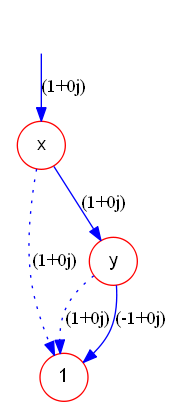

In [3]:
var_order=['x','y','z','a']
Ini_TDD(var_order)
U=np.array([[1,1],[1,-1]])
# X=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]).reshape(2,2,2,2)
tdd1=get_tdd(U,[Index('x',0),Index('y',0)])
print(tdd1.unique_table)
print(get_unique_table())
TDD_show(tdd1)

('z', (1000000, 0), (-1000000, 0), 0, 0) 3
('y', (1000000, 0), (1000000, 0), 0, 3) 4
{2: {0: <TDD.TDD.Node object at 0x0000026EED8DBF48>, 3: <TDD.TDD.Node object at 0x0000026EED8DE108>}, 1: {4: <TDD.TDD.Node object at 0x0000026EAD80CE88>}}
{1: <TDD.TDD.Node object at 0x0000026EED8DBF48>, ('y', (1000000, 0), (-1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DE1C8>, ('x', (1000000, 0), (1000000, 0), 0, 1): <TDD.TDD.Node object at 0x0000026EED4BBB48>, ('z', (1000000, 0), (-1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DE108>, ('y', (1000000, 0), (1000000, 0), 0, 3): <TDD.TDD.Node object at 0x0000026EAD80CE88>}


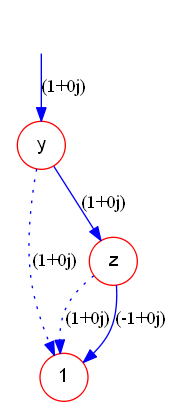

In [4]:
U=np.array([[1,1],[1,-1]])
# X=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]).reshape(2,2,2,2)
tdd2=get_tdd(U,[Index('y',0),Index('z',0)])
print(tdd2.unique_table)
print(get_unique_table())
TDD_show(tdd2)

('z', (1000000, 0), (0, 0), 0, 0) 5
('z', (0, 0), (1000000, 0), 0, 0) 6
{1: {0: <TDD.TDD.Node object at 0x0000026EED49E388>, 1: <TDD.TDD.Node object at 0x0000026EED8DEA08>}, 0: {2: <TDD.TDD.Node object at 0x0000026EED4BBB48>}}
{1: <TDD.TDD.Node object at 0x0000026EED8DBF48>, ('y', (1000000, 0), (-1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DE1C8>, ('x', (1000000, 0), (1000000, 0), 0, 1): <TDD.TDD.Node object at 0x0000026EED4BBB48>, ('z', (1000000, 0), (-1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DE108>, ('y', (1000000, 0), (1000000, 0), 0, 3): <TDD.TDD.Node object at 0x0000026EAD80CE88>, ('z', (1000000, 0), (0, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED49E388>, ('z', (0, 0), (1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DEA08>}


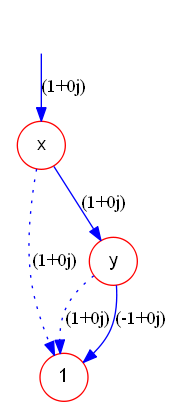

In [5]:
tdd=loc_contract(tdd1,tdd2,['y'])
print(tdd.unique_table)
print(get_unique_table())
TDD_show(tdd)

('x', (1000000, 0), (1000000, 0), 5, 6) 7
{2: {5: <TDD.TDD.Node object at 0x0000026EED49E388>, 6: <TDD.TDD.Node object at 0x0000026EED8DEA08>}, 0: {7: <TDD.TDD.Node object at 0x0000026EED8DEF08>}}
{1: <TDD.TDD.Node object at 0x0000026EED8DBF48>, ('y', (1000000, 0), (-1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DE1C8>, ('x', (1000000, 0), (1000000, 0), 0, 1): <TDD.TDD.Node object at 0x0000026EED4BBB48>, ('z', (1000000, 0), (-1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DE108>, ('y', (1000000, 0), (1000000, 0), 0, 3): <TDD.TDD.Node object at 0x0000026EAD80CE88>, ('z', (1000000, 0), (0, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED49E388>, ('z', (0, 0), (1000000, 0), 0, 0): <TDD.TDD.Node object at 0x0000026EED8DEA08>, ('x', (1000000, 0), (1000000, 0), 5, 6): <TDD.TDD.Node object at 0x0000026EED8DEF08>}


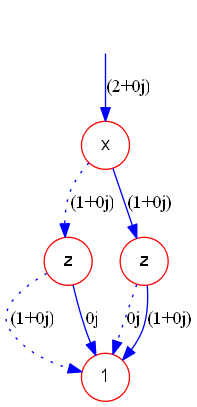

In [6]:
tdd=global_normalize(tdd)
print(tdd.unique_table)
print(get_unique_table())
TDD_show(tdd)